## Artificial Neural Networks with Keras


First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Building an Image Classifier

First let's import TensorFlow and Keras

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.3.1'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

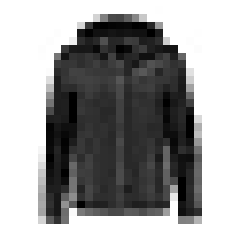

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train


array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'


The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

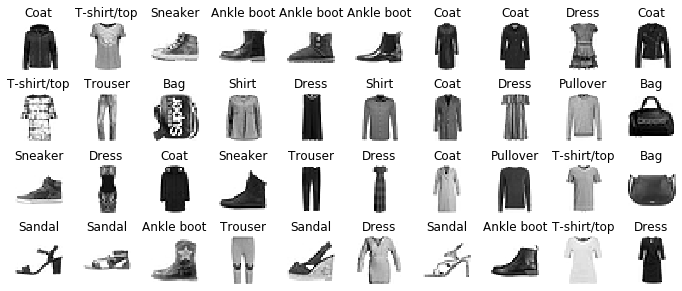

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

### model 1 (optimizer ADAM)

In [15]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

### model 2 (optimizer stochastic gradient descent)

In [16]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

###  model 3 (optimizer RMSpop)

In [17]:
model3= keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[28, 28]))
model3.add(keras.layers.Dense(300, activation="relu"))
model3.add(keras.layers.Dense(100, activation="relu"))
model3.add(keras.layers.Dense(10, activation="softmax"))

## Model 4 avec plus de couches (layers) 

In [18]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[28, 28]))
model4.add(keras.layers.Dense(300, activation="relu"))
model4.add(keras.layers.Dense(300, activation="relu"))
model4.add(keras.layers.Dense(100, activation="relu"))
model4.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
#keras.backend.clear_session()
np.random.seed(42)

or using the folowing method

In [20]:
#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation="relu"),
#    keras.layers.Dense(100, activation="relu"),
 #   keras.layers.Dense(10, activation="softmax")
#])

In [21]:
model1.layers
model2.layers
model3.layers

In [22]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
____________________________

In [23]:
hidden1_model1 = model1.layers[1]
hidden1_model2 = model2.layers[1]
hidden1_model3 = model3.layers[1]

#hidden1.name

In [24]:
hidden1_model4 = model4.layers[1]

In [25]:
#model.get_layer(hidden1.name) is hidden1

In [26]:
weights1, biases1 = hidden1_model1.get_weights()
weights2, biases2 = hidden1_model2.get_weights()
weights3, biases3 = hidden1_model3.get_weights()


In [27]:
weights4, biases4 = hidden1_model4.get_weights()

In [28]:
weights1
weights2
weights3



array([[ 0.03869117, -0.04929594, -0.00996195, ...,  0.07362023,
        -0.02853382,  0.04406986],
       [ 0.00685047, -0.00263154, -0.0356042 , ..., -0.03557554,
         0.00539165, -0.04134346],
       [-0.02602502, -0.0593543 ,  0.00865638, ..., -0.04082566,
        -0.01884331,  0.05720402],
       ...,
       [ 0.03500222,  0.06224796,  0.00094025, ..., -0.01958988,
        -0.00078505, -0.03221514],
       [-0.06643803, -0.04955602,  0.0584287 , ...,  0.03332549,
        -0.01734581, -0.04895907],
       [ 0.0639572 , -0.03875984, -0.05963442, ..., -0.01951368,
         0.05791879, -0.01171846]], dtype=float32)

In [29]:
weights4

array([[-0.00715376, -0.05233774,  0.02749593, ..., -0.06169162,
         0.0269495 , -0.03850285],
       [ 0.00540812, -0.02243083, -0.04930951, ...,  0.00851756,
        -0.05387632, -0.00754657],
       [-0.05179095,  0.06447935,  0.03884704, ..., -0.04584496,
        -0.06279118, -0.05247576],
       ...,
       [ 0.04756767, -0.03751498, -0.06493583, ...,  0.00336306,
         0.05076356, -0.0505899 ],
       [ 0.02589895, -0.06606923,  0.05875063, ..., -0.03343305,
         0.05277276, -0.00760562],
       [-0.04875952, -0.04897084,  0.06800273, ..., -0.0163358 ,
         0.03255235,  0.06642044]], dtype=float32)

In [30]:
weights1.shape
weights2.shape
weights3.shape


(784, 300)

In [31]:
weights4.shape

(784, 300)

In [32]:
biases2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases1.shape

(300,)

## Compile the Model

Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [34]:
# with optimizer ADAM
model1.compile(loss="sparse_categorical_crossentropy",
            optimizer="Adam",
           metrics=["accuracy"])

In [35]:
#with optimizer stochastic gradient descent
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [36]:
#with optimizer RMSprop
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [37]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

#This is equivalent to:

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

## Train the model

Here you can chose how many epochs you need and the batch size.

#### training model1

In [38]:
history1 = model1.fit(X_train, y_train, batch_size=50, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.4942 - accuracy: 0.8225 - val_loss: 0.3848 - val_accuracy: 0.8634
Epoch 2/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3677 - accuracy: 0.8661 - val_loss: 0.3275 - val_accuracy: 0.8808
Epoch 3/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3298 - accuracy: 0.8779 - val_loss: 0.3136 - val_accuracy: 0.8882
Epoch 4/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3062 - accuracy: 0.8856 - val_loss: 0.3130 - val_accuracy: 0.8826
Epoch 5/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.2890 - accuracy: 0.8932 - val_loss: 0.3100 - val_accuracy: 0.8828
Epoch 6/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.2723 - accuracy: 0.8986 - val_loss: 0.3190 - val_accuracy: 0.8866
Epoch 7/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.2593 - accuracy: 0.9024 - val_loss: 0.2847 - val_accuracy:

#### training model 2(optimizer SGD)

In [39]:
history2 = model2.fit(X_train, y_train, batch_size=50, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.8176 - accuracy: 0.7416 - val_loss: 0.5611 - val_accuracy: 0.8134
Epoch 2/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.5255 - accuracy: 0.8192 - val_loss: 0.4791 - val_accuracy: 0.8364
Epoch 3/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.4733 - accuracy: 0.8345 - val_loss: 0.4569 - val_accuracy: 0.8440
Epoch 4/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.4443 - accuracy: 0.8445 - val_loss: 0.4204 - val_accuracy: 0.8578
Epoch 5/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.4241 - accuracy: 0.8518 - val_loss: 0.4163 - val_accuracy: 0.8582
Epoch 6/50
1100/1100 [==============================] - 3s 3ms/step - loss: 0.4079 - accuracy: 0.8571 - val_loss: 0.3988 - val_accuracy: 0.8656
Epoch 7/50
1100/1100 [==============================] - 3s 2ms/step - loss: 0.3948 - accuracy: 0.8614 - val_loss: 0.3910 - val_accuracy:

#### trainingmodel 3 (optimizer RMSpop)

In [40]:
history3 = model3.fit(X_train, y_train, batch_size=50, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.5101 - accuracy: 0.8161 - val_loss: 0.3826 - val_accuracy: 0.8616
Epoch 2/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.3776 - accuracy: 0.8626 - val_loss: 0.3507 - val_accuracy: 0.8774
Epoch 3/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.3495 - accuracy: 0.8738 - val_loss: 0.3324 - val_accuracy: 0.8888
Epoch 4/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.3303 - accuracy: 0.8814 - val_loss: 0.3512 - val_accuracy: 0.8788
Epoch 5/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.3202 - accuracy: 0.8859 - val_loss: 0.3489 - val_accuracy: 0.8868
Epoch 6/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.3061 - accuracy: 0.8907 - val_loss: 0.3786 - val_accuracy: 0.8804
Epoch 7/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.3007 - accuracy: 0.8932 - val_loss: 0.3805 - val_accuracy:

si on augmente  batch size  le nbre d étapes dans chaque epochs diminue telle que on a remarqué que pour batch siz=30 on a 1717 steps et ensuite on augmente batch size=50 on obtient 1100 steps, si on change le nbre d'epochs le nbre de steps dans chaque iteration reste le meme ( 1100 dans le batch size=50)

### training model4 (avec des couches cachées supp)

In [41]:
history4 = model4.fit(X_train, y_train, batch_size=50, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.4865 - accuracy: 0.8246 - val_loss: 0.3925 - val_accuracy: 0.8602
Epoch 2/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.3641 - accuracy: 0.8654 - val_loss: 0.3512 - val_accuracy: 0.8686
Epoch 3/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.3259 - accuracy: 0.8800 - val_loss: 0.3356 - val_accuracy: 0.8790
Epoch 4/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.3046 - accuracy: 0.8861 - val_loss: 0.3130 - val_accuracy: 0.8882
Epoch 5/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.2838 - accuracy: 0.8942 - val_loss: 0.3224 - val_accuracy: 0.8836
Epoch 6/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.2716 - accuracy: 0.8967 - val_loss: 0.3238 - val_accuracy: 0.8814
Epoch 7/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.2590 - accuracy: 0.9027 - val_loss: 0.3103 - val_accuracy:

In [42]:
history1.params

{'verbose': 1, 'epochs': 50, 'steps': 1100}

In [43]:
history2.params

{'verbose': 1, 'epochs': 50, 'steps': 1100}

In [44]:
history3.params

{'verbose': 1, 'epochs': 50, 'steps': 1100}

In [45]:
print(history1.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [46]:
print(history2.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [47]:
print(history3.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [48]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
history3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
history4.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plot learning Curves

### optimizer ADAM

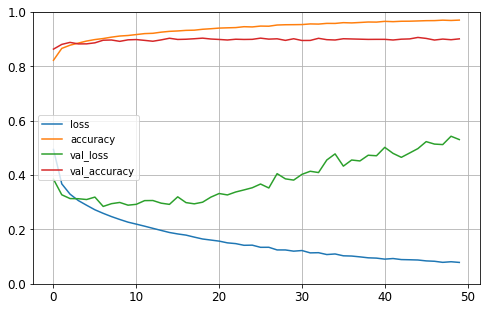

In [52]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### optimizer SGD

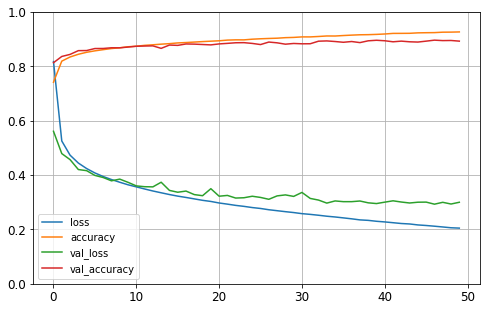

In [53]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

###  optimizer RMSpop

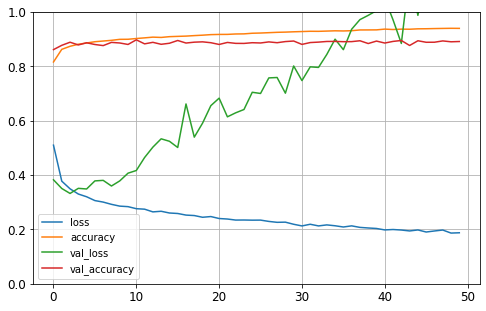

In [54]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Model 4 : plus de couches

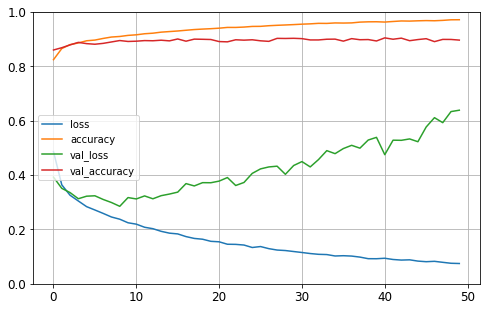

In [55]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### l'application sur les données de test

#### model1

In [56]:
predict_test1=model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6319 - accuracy: 0.8881


#### model2

In [57]:
predict_test2=model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8855


#### model3

In [58]:
predict_test3=model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0797 - accuracy: 0.8844


### model 4

In [59]:
predict_test4=model4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6744 - accuracy: 0.8908


In [60]:
X_new = X_test[:3]


In [61]:
y_proba = model1.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
y_proba = model2.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [63]:
y_proba = model3.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_proba = model4.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [65]:
y_pred1 = model1.predict_classes(X_new)
y_pred1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [66]:
y_pred2 = model2.predict_classes(X_new)
y_pred2

array([9, 2, 1], dtype=int64)

In [67]:
y_pred3 = model3.predict_classes(X_new)
y_pred3

array([9, 2, 1], dtype=int64)

In [68]:
y_pred4 = model4.predict_classes(X_new)
y_pred4

array([9, 2, 1], dtype=int64)

In [69]:
np.array(class_names)[y_pred1]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [70]:
np.array(class_names)[y_pred2]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [71]:
np.array(class_names)[y_pred3]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [72]:
np.array(class_names)[y_pred4]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [73]:

y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

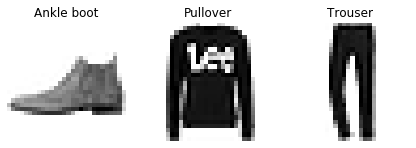

In [74]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Comparaison entre les 3 optimizers

In [75]:
comp=[]
comp.append(predict_test1[1])
comp.append(predict_test2[1])
comp.append(predict_test3[1])
comp.append(predict_test4[1])

In [76]:
comp

[0.8881000280380249,
 0.8855000138282776,
 0.8844000101089478,
 0.8907999992370605]

* on remarque que le premier modele , celui d'optimizer ADAM  est le plus performant car  il a le plus grand accuracy pour btch size=32 et epchs=30.
* et pouur un batch qui est un peu plus elevé par exemple 50  l'accuracy se diminue un peu.
* le changement de  nbre epochs ne va pas affecter rien ni le nbre de steps ni l'accuracy.
* si on ajoute  autres couches cachées  on obtient une accuracy un peu elevée que le modele précédent (avant l'ajout de couches).
* la fonction de loss a un impact sur les resultats d'accuracy sur les differents optimizers.